In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [3]:
df = pd.read_csv(r"C:\Users\nanga\OneDrive\Desktop\mp.csv")

In [4]:
print("First 5 rows:")
print(df.head())

First 5 rows:
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [39]:
df.head

<bound method NDFrame.head of      horsepower   mpg
0         130.0  18.0
1         165.0  15.0
2         150.0  18.0
3         150.0  16.0
4         140.0  17.0
..          ...   ...
393        86.0  27.0
394        52.0  44.0
395        84.0  32.0
396        79.0  28.0
397        82.0  31.0

[392 rows x 2 columns]>

In [41]:
df = df[['horsepower', 'mpg']]
print(df)

     horsepower   mpg
0         130.0  18.0
1         165.0  15.0
2         150.0  18.0
3         150.0  16.0
4         140.0  17.0
..          ...   ...
393        86.0  27.0
394        52.0  44.0
395        84.0  32.0
396        79.0  28.0
397        82.0  31.0

[392 rows x 2 columns]


In [22]:
df = df.dropna()
print("\nAfter Cleaning:")
print(df.info())




After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  392 non-null    float64
 1   mpg         392 non-null    float64
dtypes: float64(2)
memory usage: 9.2 KB
None


In [24]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


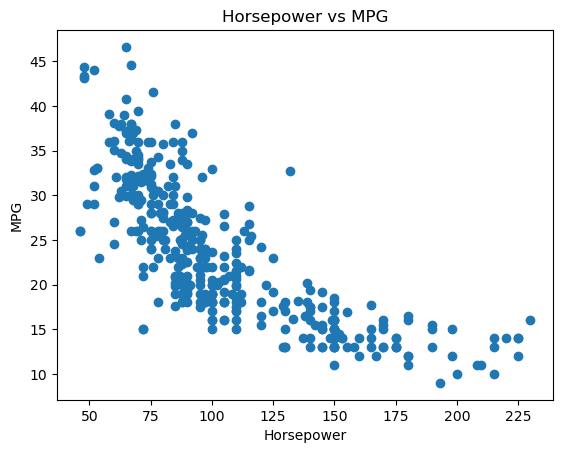

In [18]:
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG")
plt.show()

In [27]:
X = df[['horsepower']]
y = df['mpg']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_sklearn = model.predict(X_test)

print("\n--- Scikit Learn Results ---")
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred_sklearn))
print("R2 Score:", r2_score(y_test, y_pred_sklearn))



--- Scikit Learn Results ---
Slope: -0.16259724322918448
Intercept: 40.606097600118346
MSE: 22.153237123863413
R2 Score: 0.5659681822256184


In [33]:
X_train_np = np.c_[np.ones(len(X_train)), X_train.values]
y_train_np = y_train.values.reshape(-1, 1)

theta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train_np

print("\n--- Normal Equation Results ---")
print("Intercept:", theta[0][0])
print("Slope:", theta[1][0])


--- Normal Equation Results ---
Intercept: 40.60609760011836
Slope: -0.1625972432291844


In [34]:
X_gd = X_train.values.flatten()
y_gd = y_train.values

m = len(X_gd)
theta0 = 0
theta1 = 0
learning_rate = 0.0001
epochs = 1000
for i in range(epochs):
    y_pred = theta0 + theta1 * X_gd
    
    d_theta0 = (-2/m) * np.sum(y_gd - y_pred)
    d_theta1 = (-2/m) * np.sum(X_gd * (y_gd - y_pred))
    
    theta0 -= learning_rate * d_theta0
    theta1 -= learning_rate * d_theta1

print("\n--- Gradient Descent Results ---")
print("Intercept:", theta0)
print("Slope:", theta1)


--- Gradient Descent Results ---
Intercept: -3.5330304273313215e+167
Slope: -4.188795244435963e+169


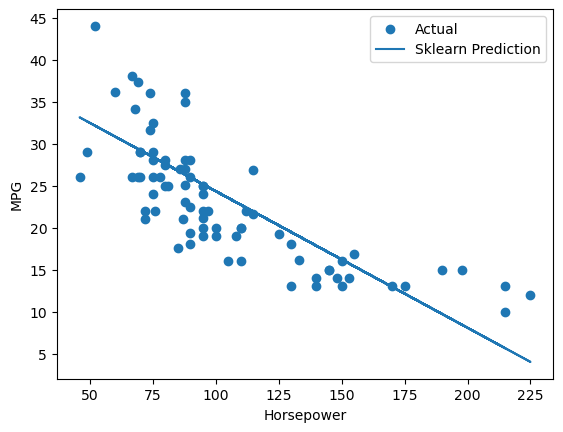

In [35]:
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred_sklearn, label="Sklearn Prediction")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.show()